In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

color_palette = sns.color_palette("husl", 8)

In [162]:
df = pd.read_csv('../data/jj.csv')
# print(df.head())

df.columns = ['date', 'data']

# print(df.head())
df.index = pd.to_datetime(df['date'])

print(df.head())

# df['date'] = pd.to_datetime(df.iloc[:,0])
# print(df['data'])
# df.set_index('date', inplace=True)
# print(df.head())

# print(df.index)

                  date  data
date                        
1960-01-01  1960-01-01  0.71
1960-04-01  1960-04-01  0.63
1960-07-02  1960-07-02  0.85
1960-10-01  1960-10-01  0.44
1961-01-01  1961-01-01  0.61


In [200]:
def create_features():
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    return df

In [212]:
df = create_features()

In [213]:
print(df)

                  date   data  year  month  day
date                                           
1960-01-01  1960-01-01   0.71  1960      1    1
1960-04-01  1960-04-01   0.63  1960      4    1
1960-07-02  1960-07-02   0.85  1960      7    2
1960-10-01  1960-10-01   0.44  1960     10    1
1961-01-01  1961-01-01   0.61  1961      1    1
...                ...    ...   ...    ...  ...
1979-10-01  1979-10-01   9.99  1979     10    1
1980-01-01  1980-01-01  16.20  1980      1    1
1980-04-01  1980-04-01  14.67  1980      4    1
1980-07-02  1980-07-02  16.02  1980      7    2
1980-10-01  1980-10-01  11.61  1980     10    1

[84 rows x 5 columns]


# Plot data with train/test split 

<Axes: xlabel='date'>

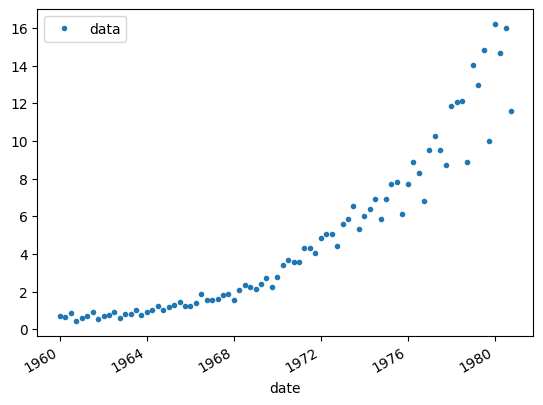

In [147]:
df.plot(style='.')

<Axes: xlabel='date'>

<Figure size 800x600 with 0 Axes>

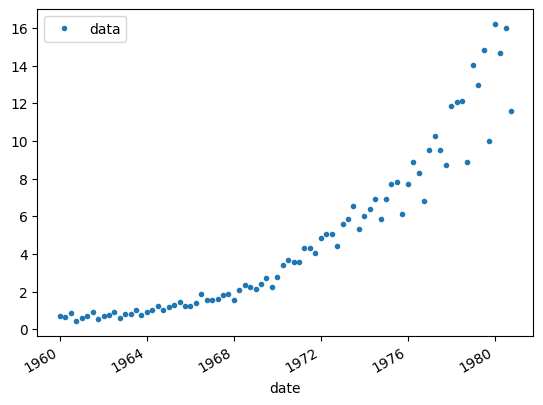

In [148]:
# fig, ax = plt.subplots()

fig = plt.figure(figsize=(8, 6))

df.plot(style='.')
# set_xlabel('Date')
# ax.set_ylabel('Earnings per share (USD)')
# ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
# # ax.axvspan(80, 83, color='#808080', alpha=0.2)

# plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# fig.autofmt_xdate()
# plt.tight_layout()

# plt.savefig('figures/CH02_F01_peixeiro.png', dpi=300)

# Split to train/test 

In [150]:
train = df[:-4]
test = df[-4:]

# Predict historical mean 

In [151]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [152]:
test.loc[:, 'pred_mean'] = historical_mean

test

,date,data,pred_mean
date,,,
1980-01-01,1980-01-01,16.20,4.3085
1980-04-01,1980-04-01,14.67,4.3085
1980-07-02,1980-07-02,16.02,4.3085
1980-10-01,1980-10-01,11.61,4.3085


In [153]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [154]:
test['data']

date
1980-01-01    16.20
1980-04-01    14.67
1980-07-02    16.02
1980-10-01    11.61
Name: data, dtype: float64

In [155]:
test['pred_mean'] = historical_mean
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

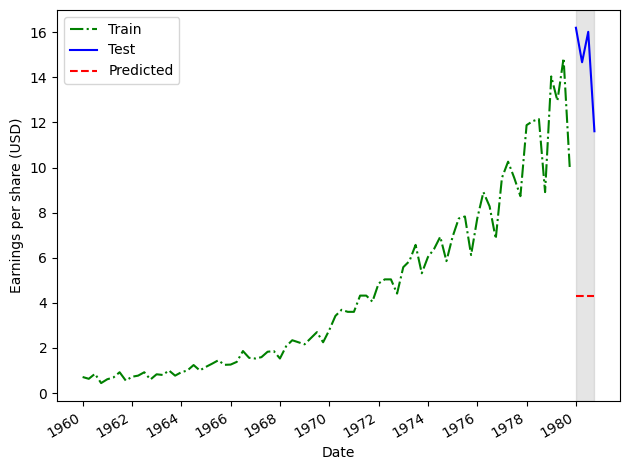

In [156]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)

# Predict last year mean 

In [201]:
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

12.96

In [205]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,date,data,pred_mean,pred__last_yr_mean
date,,,,
1980-01-01,1980-01-01,16.20,4.3085,12.96
1980-04-01,1980-04-01,14.67,4.3085,12.96
1980-07-02,1980-07-02,16.02,4.3085,12.96
1980-10-01,1980-10-01,11.61,4.3085,12.96


In [206]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

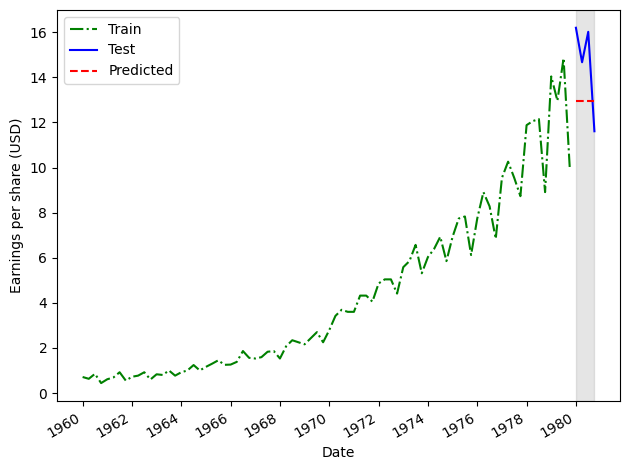

In [207]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)

# Predict last know value 

In [220]:
train['data'].tail()

date
1978-10-01     8.91
1979-01-01    14.04
1979-04-02    12.96
1979-07-02    14.85
1979-10-01     9.99
Name: data, dtype: float64

In [208]:
last = train['data'].iloc[-1]
last

9.99

In [209]:
test.loc[:, 'pred_last'] = last

test

,date,data,pred_mean,pred__last_yr_mean,pred_last
date,,,,,
1980-01-01,1980-01-01,16.20,4.3085,12.96,9.99
1980-04-01,1980-04-01,14.67,4.3085,12.96,9.99
1980-07-02,1980-07-02,16.02,4.3085,12.96,9.99
1980-10-01,1980-10-01,11.61,4.3085,12.96,9.99


In [210]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

30.457277908606535

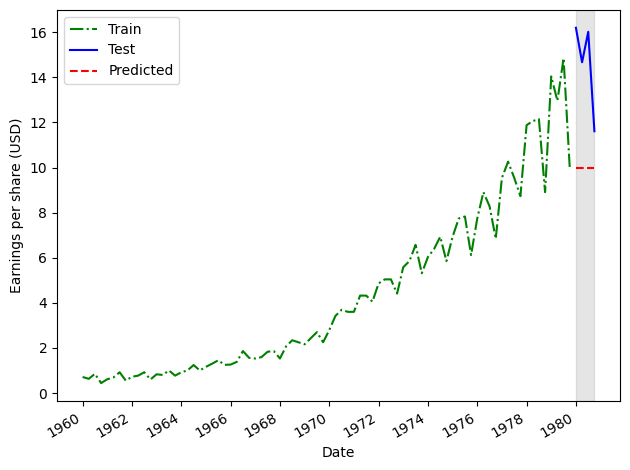

In [211]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

# Naive seasonal forecast 

To just copy the last few data samples from the training dataset that we know was contiguous before the current test dateset

In [222]:
train['data'].iloc[-4:].values

array([14.04, 12.96, 14.85,  9.99])

In [221]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

test

,date,data,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
date,,,,,,
1980-01-01,1980-01-01,16.20,4.3085,12.96,9.99,14.04
1980-04-01,1980-04-01,14.67,4.3085,12.96,9.99,12.96
1980-07-02,1980-07-02,16.02,4.3085,12.96,9.99,14.85
1980-10-01,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [47]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

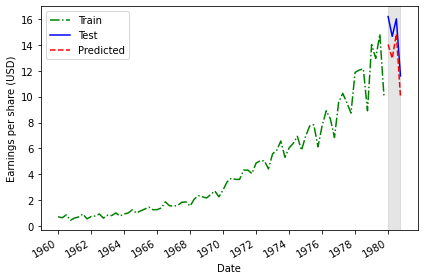

In [48]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)

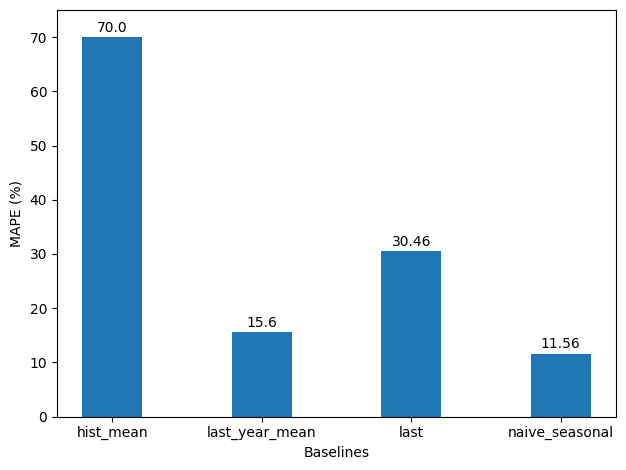

In [223]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)